In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit
from scipy import misc
import matplotlib.pyplot as plt
from pylab import * 
from scipy import stats
import requests
import math
import re
import csv

In [2]:
# PARAMETERS
mass = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])

# Restricting fit range to the peak region (-3sigma, +3sigma)
# -----------------------------------------------------------
frac1 = np.array([0.616941, 0.786107, 0.839527, 0.662698, 0.511641, 0.525997, 0.296808, 0.507125, 0.714972, 0.764215, 0.141333, 0.394128, 0.681711, 0.629811]) 
frac2 = np.array([0.908863, 0.929146, 0.00793432, 0.218216, 0.409684, 0.0504783, 0.130418, 0.162328, 0.869985, 0.946381, 0.249453, 0.828113, 0.776842, 0.669321]) 
mean1 = np.array([4.9872, 10.0093, 14.968, 19.9323, 25.0551, 29.9503, 35.0216, 39.9755, 44.9384, 49.9409, 54.9957, 59.9928, 64.9466, 69.9075]) 
mean2 = np.array([5, 8.65064, 16.4387, 20.2743, 24.7024, 25.7202, 33.6065, 39.0571, 44.2623, 49.2855, 54.4261, 59.7935, 64.3948, 69.3615]) 
mean3 = np.array([5.96956, 11.8907, 14.6674, 19.7685, 24.7828, 29.8662, 34.8912, 39.8074, 46.2013, 51.7481, 54.8818, 58.5878, 64.3462, 69.9058]) 
sigma1 = np.array([0.1, 0.154047, 0.228499, 0.258232, 0.265931, 0.314271, 0.285999, 0.416409, 0.458451, 0.573158, 0.313046, 0.517024, 0.660719, 0.650068]) 
sigma2 = np.array([2.41388, 1.86957, 1.63275, 0.303687, 0.300393, 1.55073, 1.60056, 1.59334, 1.0042, 1.14352, 1.45882, 0.853111, 1.35748, 1.43451]) 
sigma3 = np.array([0.479238, 0.311122, 7.48206, 0.647163, 0.821263, 0.665501, 0.608116, 0.790149, 0.351417, 0.301649, 0.692229, 1.84803, 1.38103, 1.17401]) 
frac1_err = np.array([0.688341, 0.569376, 0.206053, 1.10364, 1.62412, 0.724072, 1.11734, 1.23293, 0.514726, 0.523548, 1.1092, 1.33282, 0.315828, 1.2972]) 
frac2_err = np.array([0.241961, 0.616911, 0.218681, 0.829728, 0.665893, 0.906219, 0.514639, 0.903359, 0.934441, 0.770588, 0.600926, 0.881743, 0.611437, 0.628113]) 
mean1_err = np.array([0.306493, 0.112817, 0.0908072, 0.434391, 0.902711, 0.157572, 0.277435, 0.215386, 0.147939, 0.177278, 0.412849, 0.427341, 0.194531, 0.284766]) 
mean2_err = np.array([0, 2.36502, 2.2143, 5.99852, 2.56425, 7.97274, 9.78187, 11.3017, 2.4347, 1.99916, 1.33508, 1.06198, 4.08843, 6.71428]) 
mean3_err = np.array([1.11984, 2.0464, 2.50554, 0.852838, 0.552944, 0.621105, 0.291228, 0.929034, 0.978362, 0.853967, 0.347962, 6.39131, 18.741, 9.28738]) 
sigma1_err = np.array([0.55078, 0.134821, 0.0835539, 0.252427, 0.412495, 0.236319, 0.323419, 0.350385, 0.200814, 0.230197, 0.608327, 0.678947, 0.199427, 0.415275]) 
sigma2_err = np.array([0.936492, 1.9108, 1.13456, 1.50125, 2.36594, 1.94021, 1.57663, 1.65103, 0.841381, 0.677882, 1.91895, 1.6133, 1.73782, 1.5363]) 
sigma3_err = np.array([2.09388, 7.114, 7.17528, 0.685283, 0.97078, 0.638206, 0.476611, 1.15237, 6.87874, 8.72117, 0.574366, 5.43464, 8.69121, 8.66027])

# All range used for the fit
# --------------------------
#frac1 = np.array([0.886456, 0.681364, 0.786907, 0.566721, 0.514646, 0.434888, 0.407632, 0.620274, 0.535092, 0.608639, 0.597787, 0.764493, 0.626049, 0.624971])  
#frac2 = np.array([0.00883064, 0.275998, 0.142568, 0.114191, 0.842504, 0.122557, 0.895859, 0.915277, 0.940601, 0.930161, 0.939156, 0.928055, 0.920375, 0.934046])  
#mean1 = np.array([4.9793, 10.0099, 14.9725, 19.9551, 24.989, 29.8883, 35.0046, 39.9655, 44.9476, 49.9392, 54.9386, 59.9312, 64.9498, 69.9136])  
#mean2 = np.array([4.67346, 10.3219, 15.5491, 19.1298, 24.8623, 28.7529, 34.847, 39.6907, 44.7139, 49.6721, 54.6373, 59.2321, 64.5151, 69.5795])  
#mean3 = np.array([5.54407, 9.78613, 14.6826, 19.896, 24.3041, 29.9518, 33.2069, 37.5314, 41.8783, 46.8025, 51.5966, 55.8556, 62.0276, 66.356])  
#sigma1 = np.array([0.216797, 0.136019, 0.218335, 0.248473, 0.272946, 0.63572, 0.323267, 0.44983, 0.413252, 0.520182, 0.540543, 0.639322, 0.640735, 0.65206])  
#sigma2 = np.array([1.2631, 0.300017, 0.300075, 1.22859, 0.571889, 1.14219, 0.695459, 0.963773, 0.939715, 1.0669, 1.16026, 1.42676, 1.2699, 1.3325])  
#sigma3 = np.array([0.300033, 0.390618, 0.624522, 0.504384, 1.32994, 0.309007, 1.50716, 2.44147, 2.01947, 2.59087, 2.96549, 4.02076, 2.78533, 2.70579])  
#frac1_err = np.array([0.678527, 0.790847, 0.421127, 1.28313, 1.21838, 0.651805, 1.20185, 0.592574, 0.461446, 0.643294, 0.533345, 0.323995, 0.65905, 0.567116])  
#frac2_err = np.array([0.225629, 0.571755, 0.845914, 0.51853, 0.800894, 0.544518, 0.195716, 0.194352, 0.134521, 0.156031, 0.135561, 0.194002, 0.218327, 0.715531])  
#mean1_err = np.array([0.51514, 0.144636, 0.112176, 0.136987, 0.196257, 0.383527, 0.200995, 0.160503, 0.14796, 0.182141, 0.186384, 0.173422, 0.257498, 0.22247])  
#mean2_err = np.array([1.03082, 2.53787, 1.66086, 3.06523, 0.470959, 7.15274, 0.373389, 0.656622, 0.438584, 0.666374, 0.575523, 1.05319, 0.972571, 0.806675])   
#sigma1_err = np.array([0.346311, 0.155795, 0.111011, 0.213228, 0.294405, 0.463902, 0.305831, 0.243091, 0.223687, 0.298653, 0.286217, 0.195013, 0.360941, 0.318514])  
#sigma2_err = np.array([1.08833, 2.35822, 2.16931, 1.81069, 1.41101, 0.862055, 0.475053, 0.723719, 0.42805, 0.741372, 0.632318, 0.832011, 0.916108, 0.8462])  
#sigma3_err = np.array([2.14569, 1.98587, 0.493271, 0.521568, 1.48159, 1.41727, 1.07813, 2.41631, 1.99247, 2.41594, 2.74342, 6.70756, 2.54673, 3.45488])   

v_m = []
v_q = []

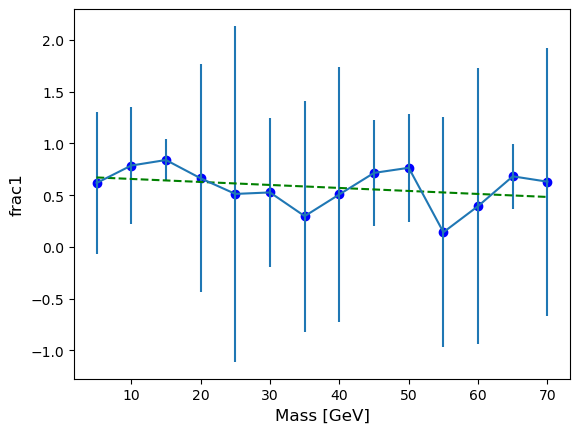

In [3]:
p = polyfit(mass, frac1, 1)
#print(p)
#print("m = ", p[0])
#print("q = ", p[1])
v_m.append(p[0])
v_q.append(p[1])
x1 = linspace(5,70) 
f1 = polyval(p,x1)
plt.plot(mass, frac1, 'o', color="blue")
plt.errorbar(mass, frac1, yerr=frac1_err)
#plt.errorbar(mass, frac1, yerr=frac1_err, uplims=True, lolims=True, label='uplims=True, lolims=True')
plt.plot(x1,f1,'g--') 

plt.xlabel('Mass [GeV]', fontsize=12)
plt.ylabel('frac1', fontsize=12)
#plt.ylim(0.0, 2.0)
plt.savefig('simpleFits/frac1_fit.pdf', dpi=1200)
plt.savefig('simpleFits/frac1_fit.png', dpi=1200)

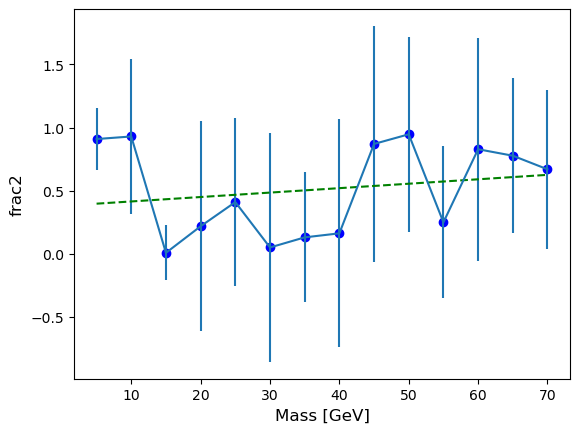

In [4]:
#plt.scatter(mass, frac2, color="blue")

p = polyfit(mass, frac2, 1)
#print(p)
v_m.append(p[0])
v_q.append(p[1])
x1 = linspace(5,70)
f1 = polyval(p,x1)
plt.plot(mass, frac2, 'o', color="blue")
plt.errorbar(mass, frac2, yerr=frac2_err)
plt.plot(x1,f1,'g--') 

plt.xlabel('Mass [GeV]', fontsize=12)
plt.ylabel('frac2', fontsize=12)
#plt.ylim(0.0, 2.0)
plt.savefig('simpleFits/frac2_fit.pdf', dpi=1200)
plt.savefig('simpleFits/frac2_fit.png', dpi=1200)

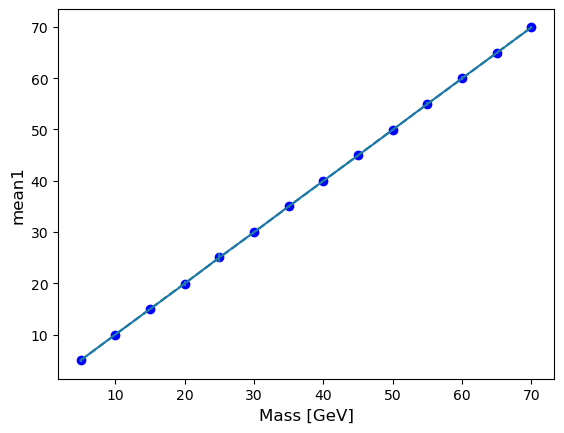

In [5]:
#p_mean1 = plt.scatter(mass, mean1, color="blue")

p = polyfit(mass, mean1, 1)
#print(p)
v_m.append(p[0])
v_q.append(p[1])
x1 = linspace(5,70)
f1 = polyval(p,x1)
plt.plot(mass, mean1, 'o', color="blue")
plt.errorbar(mass, mean1, yerr=mean1_err)
plt.plot(x1,f1,'g--') 

plt.xlabel('Mass [GeV]', fontsize=12)
plt.ylabel('mean1', fontsize=12)
#plt.ylim(0.0, 1.)
plt.savefig('simpleFits/mean1_fit.pdf', dpi=1000)
plt.savefig('simpleFits/mean1_fit.png', dpi=1000)

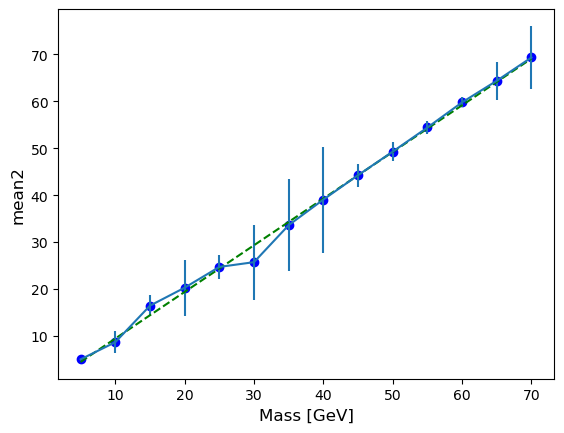

In [6]:
#p_mean2 = plt.scatter(mass, mean2, color="blue")

p = polyfit(mass, mean2, 1)
#print(p)
v_m.append(p[0])
v_q.append(p[1])
x1 = linspace(5,70)
f1 = polyval(p,x1)
plt.plot(mass, mean2, 'o', color="blue")
plt.errorbar(mass, mean2, yerr=mean2_err)
plt.plot(x1,f1,'g--') 

plt.xlabel('Mass [GeV]', fontsize=12)
plt.ylabel('mean2', fontsize=12)
#plt.ylim(0.0, 1.)
plt.savefig('simpleFits/mean2_fit.pdf', dpi=1000)
plt.savefig('simpleFits/mean2_fit.png', dpi=1000)

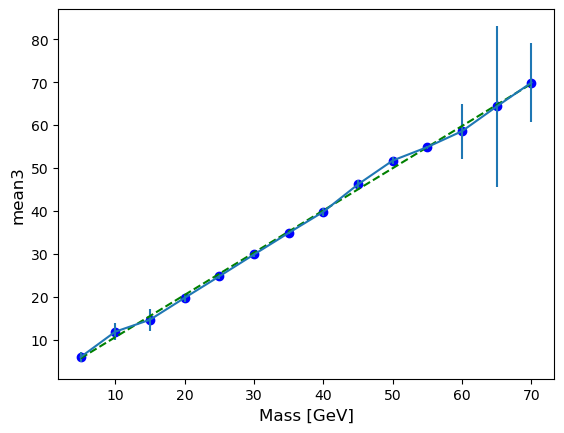

In [7]:
#p_mean3 = plt.scatter(mass, mean3, color="blue")

p = polyfit(mass, mean3, 1)
#print(p)
v_m.append(p[0])
v_q.append(p[1])
x1 = linspace(5,70)
f1 = polyval(p,x1)
plt.plot(mass, mean3, 'o', color="blue")
plt.errorbar(mass, mean3, yerr=mean3_err)
plt.plot(x1,f1,'g--') 

plt.xlabel('Mass [GeV]', fontsize=12)
plt.ylabel('mean3', fontsize=12)
#plt.ylim(0.0, 1.)
plt.savefig('simpleFits/mean3_fit.pdf', dpi=1000)
plt.savefig('simpleFits/mean3_fit.png', dpi=1000)

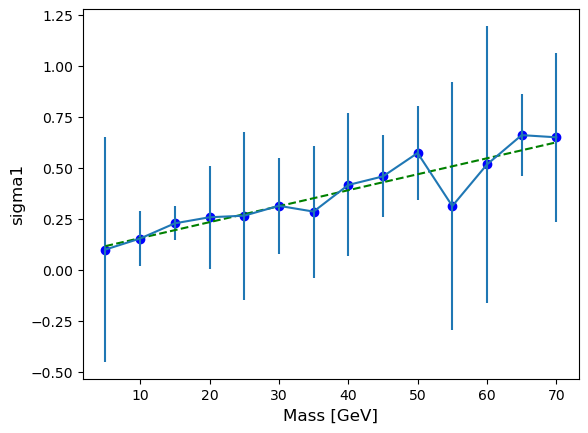

In [8]:
#p_sigma1 = plt.scatter(mass, sigma1, color="blue")

p = polyfit(mass, sigma1, 1)
#print(p)
v_m.append(p[0])
v_q.append(p[1])
x1 = linspace(5,70)
f1 = polyval(p,x1)
plt.plot(mass, sigma1, 'o', color="blue")
plt.errorbar(mass, sigma1, yerr=sigma1_err)
plt.plot(x1,f1,'g--') 

plt.xlabel('Mass [GeV]', fontsize=12)
plt.ylabel('sigma1', fontsize=12)
#plt.ylim(0.0, 1.5)
plt.savefig('simpleFits/sigma1_fit.pdf', dpi=1000)
plt.savefig('simpleFits/sigma1_fit.png', dpi=1000)

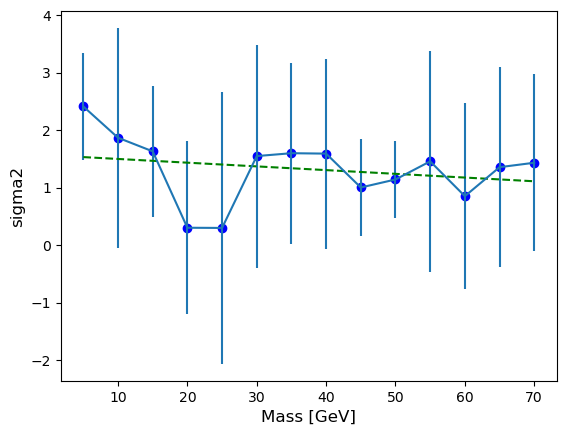

In [9]:
#p_sigma2 = plt.scatter(mass, sigma2, color="blue")

p = polyfit(mass, sigma2, 1)
#print(p)
v_m.append(p[0])
v_q.append(p[1])
x1 = linspace(5,70)
f1 = polyval(p,x1)
plt.plot(mass, sigma2, 'o', color="blue")
plt.errorbar(mass, sigma2, yerr=sigma2_err)
plt.plot(x1,f1,'g--') 

plt.xlabel('Mass [GeV]', fontsize=12)
plt.ylabel('sigma2', fontsize=12)
#plt.ylim(0.0, 1.5)
plt.savefig('simpleFits/sigma2_fit.pdf', dpi=1000)
plt.savefig('simpleFits/sigma2_fit.png', dpi=1000)

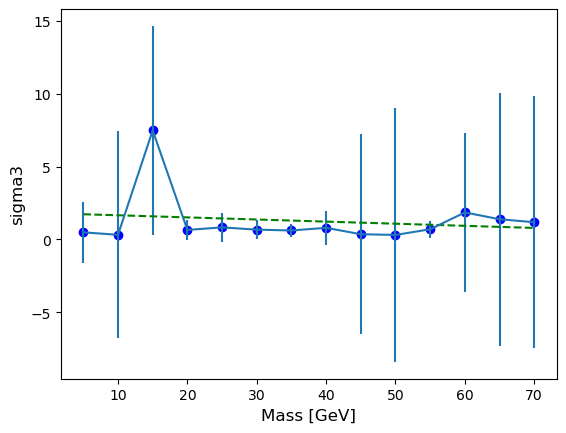

In [10]:
#p_sigma3 = plt.scatter(mass, sigma3, color="blue")

p = polyfit(mass, sigma3, 1)
#print(p)
v_m.append(p[0])
v_q.append(p[1])
x1 = linspace(5,70)
f1 = polyval(p,x1)
plt.plot(mass, sigma3, 'o', color="blue")
plt.errorbar(mass, sigma3, yerr=sigma3_err)
plt.plot(x1,f1,'g--') 

plt.xlabel('Mass [GeV]', fontsize=12)
plt.ylabel('sigma3', fontsize=12)
#plt.ylim(0.0, 2.5)
plt.savefig('simpleFits/sigma3_fit.pdf', dpi=1000)
plt.savefig('simpleFits/sigma3_fit.png', dpi=1000)

In [11]:
# Extract all values for the"closure test" from the fits
new_frac1 = []
new_frac2 = []
new_mean1 = []
new_mean2 = []
new_mean3 = []
new_sigma1 = []
new_sigma2 = []
new_sigma3 = []
#print("v_m", v_m)
#print("v_q", v_q)

for m in range(len(mass)):
    #print("mass = ", mass[m])
    new_frac1.append(v_m[0]*mass[m] + v_q[0])
    new_frac2.append(v_m[1]*mass[m] + v_q[1])
    new_mean1.append(v_m[2]*mass[m] + v_q[2])
    new_mean2.append(v_m[3]*mass[m] + v_q[3])
    new_mean3.append(v_m[4]*mass[m] + v_q[4])
    new_sigma1.append(v_m[5]*mass[m] + v_q[5])
    new_sigma2.append(v_m[6]*mass[m] + v_q[6])
    new_sigma3.append(v_m[7]*mass[m] + v_q[7])
    #p_frac1 = polyval(v_frac1_fits[p],x1)
    #plt.plot(x1,p_frac1,l_colors[p], label=v_masspoints[p])
    
print("---------------------------------------------------------")
print("New parameters for each mass point for the closure test: ")
print("---------------------------------------------------------")
print("frac1 = ", new_frac1)
print("frac2 = ", new_frac2)
print("mean1 = ", new_mean1)
print("mean2 = ", new_mean2)
print("mean3 = ", new_mean3)
print("sigma1 = ", new_sigma1)
print("sigma2 = ", new_sigma2)
print("sigma3 = ", new_sigma3)

---------------------------------------------------------
New parameters for each mass point for the closure test: 
---------------------------------------------------------
frac1 =  [0.6709164285714286, 0.6564129560439561, 0.6419094835164835, 0.6274060109890109, 0.6129025384615384, 0.5983990659340659, 0.5838955934065932, 0.5693921208791207, 0.5548886483516482, 0.5403851758241757, 0.5258817032967031, 0.5113782307692305, 0.496874758241758, 0.48237128571428545]
frac2 =  [0.3971574411428576, 0.41470643503296745, 0.4322554289230773, 0.4498044228131871, 0.467353416703297, 0.4849024105934068, 0.5024514044835167, 0.5200003983736264, 0.5375493922637363, 0.5550983861538461, 0.572647380043956, 0.5901963739340659, 0.6077453678241757, 0.6252943617142854]
mean1 =  [4.997394285714296, 9.993632527472538, 14.989870769230782, 19.986109010989026, 24.98234725274727, 29.978585494505513, 34.97482373626375, 39.97106197802199, 44.967300219780235, 49.963538461538484, 54.959776703296725, 59.95601494505497, 64.